In [2]:
# Se importan paquetes de análisis de datos- Proceso

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

# Se importa base de plan de ventas fusión Agro - Proceso

Plan2022 = pd.read_csv("1.csv")

Precios = pd.read_csv("2.csv")

Costos = pd.read_csv("4.csv")

Plan2022_ = pd.read_csv("5.csv")

BaseVentasFusionAgro = pd.read_csv("11.csv")

# Se importan categorías de producto, cultivo y cliente

Zona = pd.read_csv("Zona.csv")

Producto = pd.read_csv("Producto.csv")

Cultivo = pd.read_csv("Cultivo.csv")

Producto_ = Producto.groupby(['Administracion de la categoria','H1 o H2 o Resto','Producto_Ranking']).agg({'Producto_': 'count'})


Zona_ = Zona.groupby(['Empresa','Zona','RM/ REIQ']).agg({'RM/ REIQ': 'count'})


Cultivos= Cultivo[(Cultivo['Cultivo_Categoría'] != "-") & (Cultivo['Cultivo_Categoría'] != "Otros")]

Cultivo_ = Cultivos.groupby(['Cultivo_Macrocategoría','Cultivo_Categoría','Cultivo_']).agg({'Cultivo_': 'count'})


# Se incluyen las categorías en la base

Ventas_zona = BaseVentasFusionAgro.merge(Zona, how='left', left_on='RM/ REIQ', right_on='RM/ REIQ_')

Ventas_zona_producto = Ventas_zona.merge(Producto, how='left', left_on='Producto_', right_on='Producto_')

Ventas_zona_producto_cultivo_ = Ventas_zona_producto.merge(Cultivo, how='left', left_on='Cultivo_', right_on='Cultivo', indicator = True)

# Filtro de mes 1 y 2

T1 = [1, 2, 3]

Ventas_zona_producto_cultivo = Ventas_zona_producto_cultivo_[Ventas_zona_producto_cultivo_['Mes'].isin(
    T1)]

# Análisis del primer trimestre de Base de ventas Fusión Agro

# Utilidad Fusión Agro por zona y por año 

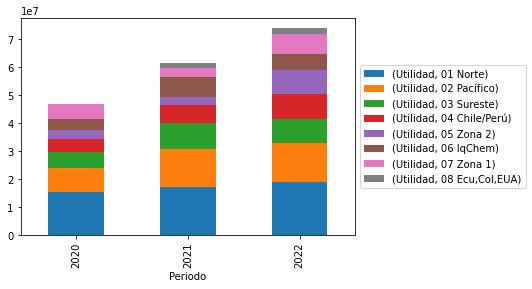

In [3]:
UZA = Ventas_zona_producto_cultivo.groupby(['Periodo','Zona_Ranking']).agg({'Utilidad': 'sum'}).reset_index()
UZA_ = Ventas_zona_producto_cultivo.groupby(['Periodo','Zona_Ranking']).agg({'Utilidad': 'sum'})
UZA_df = pd.DataFrame(UZA_.unstack(level = 1))
UZA_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [4]:
UZA2 = Ventas_zona_producto_cultivo.groupby(['Periodo']).agg({'Utilidad': 'sum'})
UZA2.head(20)

,Utilidad
Periodo,
2020,4.699915e+07
2021,6.146052e+07
2022,7.394561e+07


# Utilidad Fusión Agro 

In [5]:
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_2022['Utilidad'].sum()/1000000) )

NameError: name 'Ventas_zona_producto_cultivo_2022' is not defined

In [ ]:
Pormesyzona = Ventas_zona_producto_cultivo_2022.groupby(['Mes','Zona_Ranking']).agg({'Utilidad': 'sum'}).reset_index()
Pormesyzona_ = Ventas_zona_producto_cultivo_2022.groupby(['Mes','Zona_Ranking']).agg({'Utilidad': 'sum'})
Pormesyzona_df = pd.DataFrame(Pormesyzona_.unstack(level = 1))
Pormesyzona_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Crecimiento respecto al 2021

In [ ]:
print ('{:,.2f} %'.format(
                            ((Ventas_zona_producto_cultivo_2022['Utilidad'].sum()/
                            Ventas_zona_producto_cultivo_2021['Utilidad'].sum())-1)*100
                        )) 

 # Desglose por zona y por categoría

In [ ]:
Ventas_zona_producto_cultivo_2022 = Ventas_zona_producto_cultivo[h]

In [ ]:
RCZ = Ventas_zona_producto_cultivo_2022.groupby(['Administracion de la categoria','Zona_Ranking']).agg({'Utilidad': 'sum'}).reset_index()
RCZ_ = Ventas_zona_producto_cultivo_2022.groupby(['Administracion de la categoria','Zona_Ranking']).agg({'Utilidad': 'sum'})
RCZ_df = pd.DataFrame(RCZ_.unstack(level = 1))
RCZ_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
RCZ2 = Ventas_zona_producto_cultivo_2022.groupby(['Administracion de la categoria']).agg({'Utilidad': 'sum'})
RCZ2.head(20)

# Desglose por zona y por horizonte

In [ ]:
RCZ_H = Ventas_zona_producto_cultivo_2022.groupby(['H1 o H2 o Resto','Zona_Ranking']).agg({'Utilidad': 'sum'}).reset_index()
RCZ__H = Ventas_zona_producto_cultivo_2022.groupby(['H1 o H2 o Resto','Zona_Ranking']).agg({'Utilidad': 'sum'})
RCZ_df_H = pd.DataFrame(RCZ__H.unstack(level = 1))
RCZ_df_H.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
RCZ_H2 = Ventas_zona_producto_cultivo_2022.groupby(['H1 o H2 o Resto']).agg({'Utilidad': 'sum'})
RCZ_H2.head(20)

# Top 20 prioridades en todo Fusión Agro

In [ ]:
Detalle2022 = Ventas_zona_producto_cultivo_2022.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking','Administracion de la categoria']).agg({'Utilidad': 'sum'})
Detalle2022_sorted = Detalle2022.sort_values(by=['Utilidad'],ascending=False)
Detalle2022_sorted.head(20)

In [ ]:
print ('${:,.3f} M'.format(Detalle2022_sorted['Utilidad'].head(20).sum()/1000000) )


# Análisis por categoría

# Cito, 2022

# Valor de Cito y lo que representa respecto a utilidad total

In [ ]:
utilidadtotal2022 = Ventas_zona_producto_cultivo_2022['Utilidad'].sum()
utilidadcito2022 = Ventas_zona_producto_cultivo_Cito_2022['Utilidad'].sum()
utilidadcito2022/ utilidadtotal2022
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_Cito_2022['Utilidad'].sum()/1000000) )
print ('{:,.1f} %'.format(utilidadcito2022*100/ utilidadtotal2022))


In [ ]:
Ventas_zona_producto_cultivo_Cito_2022 = Ventas_zona_producto_cultivo[a & b]

In [ ]:
ResumenporHorizonteyEmp = Ventas_zona_producto_cultivo_Cito_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'}).reset_index()
ResumenporHorizonteyEmp_ = Ventas_zona_producto_cultivo_Cito_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'})
ResumenporHorizonteyEmp_df = pd.DataFrame(ResumenporHorizonteyEmp_.unstack(level = 1))
ResumenporHorizonteyEmp_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
Ventas_zona_Cito_2022 = ResumenporHorizonteyEmp.groupby(['Zona_Ranking']).agg({'Utilidad': 'sum'})
Ventas_zona_Cito_2022_sorted = Ventas_zona_Cito_2022.sort_values(by=['Utilidad'],ascending=False)
Ventas_zona_Cito_2022_sorted.head(20)

# Top 10

In [ ]:
DetalleCito2022 = Ventas_zona_producto_cultivo_Cito_2022.groupby(['Cultivo_Categoría','Zona_Ranking']).agg({'Utilidad': 'sum'})
DetalleCito2022_sorted = DetalleCito2022.sort_values(by=['Utilidad'],ascending=False)
DetalleCito2022_sorted.head(10)


In [ ]:
print('${:,.3f} M'.format(DetalleCito2022_sorted['Utilidad'].head(10).sum()/1000000))

# Raíz/ Suelo, 2022

In [ ]:
c = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "2 Raiz/ suelo"
d = Ventas_zona_producto_cultivo['Periodo'] == 2022

In [ ]:
Ventas_zona_producto_cultivo_Suelo_2022 = Ventas_zona_producto_cultivo[c & d]

# Valor de RaízSuelo y lo que representa respecto a utilidad total

In [ ]:
utilidadtotal2022 = Ventas_zona_producto_cultivo_2022['Utilidad'].sum()
utilidadsuelo2022 = Ventas_zona_producto_cultivo_Suelo_2022['Utilidad'].sum()
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_Suelo_2022['Utilidad'].sum()/1000000) )
print ('{:,.1f} %'.format(utilidadsuelo2022*100/ utilidadtotal2022))


In [ ]:
ResumenporHorizonteyEmp_Suelo = Ventas_zona_producto_cultivo_Suelo_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'}).reset_index()
ResumenporHorizonteyEmp_Suelo_ = Ventas_zona_producto_cultivo_Suelo_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'})
ResumenporHorizonteyEmp_Suelo_df = pd.DataFrame(ResumenporHorizonteyEmp_Suelo_.unstack(level = 1))
ResumenporHorizonteyEmp_Suelo_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
Ventas_zona_Suelo_2022 = Ventas_zona_producto_cultivo_Suelo_2022.groupby(['Zona_Ranking']).agg({'Utilidad': 'sum'})
Ventas_zona_Suelo_2022.head(20)

# Top 10 

In [ ]:
DetalleSuelo2022 = Ventas_zona_producto_cultivo_Suelo_2022.groupby(['Cultivo_Categoría','Zona_Ranking']).agg({'Utilidad': 'sum'})
DetalleSuelo2022_sorted = DetalleSuelo2022.sort_values(by=['Utilidad'],ascending=False)
DetalleSuelo2022_sorted.head(10)

In [ ]:
print('${:,.3f} M'.format(DetalleSuelo2022_sorted['Utilidad'].head(10).sum()/1000000))

# Bioestimulante, 2022

# Valor de Bioestimulante y lo que representa respecto a utilidad total

In [ ]:
utilidadtotal2022 = Ventas_zona_producto_cultivo_2022['Utilidad'].sum()
utilidadbioest2022 = Ventas_zona_producto_cultivo_Bioest_2022['Utilidad'].sum()
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_Bioest_2022['Utilidad'].sum()/1000000) )
print ('{:,.1f} %'.format(utilidadbioest2022*100/ utilidadtotal2022))


In [ ]:
ResumenporHorizonteyEmp_Bioest = Ventas_zona_producto_cultivo_Bioest_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'}).reset_index()
ResumenporHorizonteyEmp_Bioest_ = Ventas_zona_producto_cultivo_Bioest_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'})
ResumenporHorizonteyEmp_Bioest_df = pd.DataFrame(ResumenporHorizonteyEmp_Bioest_.unstack(level = 1))
ResumenporHorizonteyEmp_Bioest_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
Ventas_zona_Bioest_2022 = Ventas_zona_producto_cultivo_Bioest_2022.groupby(['Zona_Ranking']).agg({'Utilidad': 'sum'})
Ventas_zona_Bioest_2022.head(20)

# Top 10 

In [ ]:
DetalleBioest2022 = Ventas_zona_producto_cultivo_Bioest_2022.groupby(['Cultivo_Categoría','Zona_Ranking']).agg({'Utilidad': 'sum'})
DetalleBioest2022_sorted = DetalleBioest2022.sort_values(by=['Utilidad'],ascending=False)
DetalleBioest2022_sorted.head(10)

In [ ]:
print('${:,.3f} M'.format(DetalleBioest2022_sorted['Utilidad'].head(10).sum()/1000000))

# Coady 2022

In [ ]:
g = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "4 Coadyuvante"
h = Ventas_zona_producto_cultivo['Periodo'] == 2022

In [ ]:
Ventas_zona_producto_cultivo_Coady_2022 = Ventas_zona_producto_cultivo[g & h]

# Valor de Coadyuvante y lo que  representa respecto a utilidad total 

In [ ]:
utilidadtotal2022 = Ventas_zona_producto_cultivo_2022['Utilidad'].sum()
utilidadcoady2022 = Ventas_zona_producto_cultivo_Coady_2022['Utilidad'].sum()
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_Coady_2022['Utilidad'].sum()/1000000) )
print ('{:,.1f} %'.format(utilidadcoady2022*100/ utilidadtotal2022))

In [ ]:
ResumenporHorizonteyEmp_Coady = Ventas_zona_producto_cultivo_Coady_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'}).reset_index()
ResumenporHorizonteyEmp_Coady_ = Ventas_zona_producto_cultivo_Coady_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad': 'sum'})
ResumenporHorizonteyEmp_Coady_df = pd.DataFrame(ResumenporHorizonteyEmp_Coady_.unstack(level = 1))
ResumenporHorizonteyEmp_Coady_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
Ventas_zona_Coady_2022 = Ventas_zona_producto_cultivo_Coady_2022.groupby(['Zona_Ranking']).agg({'Utilidad': 'sum'})
Ventas_zona_Coady_2022.head(20)

# Análisis Mx vs "Internacional"

# Cito en México, 2022


In [ ]:
i = Ventas_zona_producto_cultivo ['Empresa'] == "México"
j = Ventas_zona_producto_cultivo ['Administracion de la categoria'] == "1 Cito"
k = Ventas_zona_producto_cultivo ['Periodo'] == 2022
l = Ventas_zona_producto_cultivo ['Empresa'] != "México"
CitoMx = Ventas_zona_producto_cultivo[i & j & k]
CitoIntnl = Ventas_zona_producto_cultivo[l & j & k]


In [ ]:
print ('${:,.3f} M'.format(CitoMx['Utilidad'].sum()/1000000) )


In [ ]:
ResumenporCultyZona_CitoMx = CitoMx.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_CitoMx_df = pd.DataFrame(ResumenporCultyZona_CitoMx.unstack(level = 1))
ResumenporCultyZona_CitoMx_df.plot(kind = 'bar')

In [ ]:
ResumenporCultyZona_CitoMx2 = CitoMx.groupby(['Cultivo_Categoría_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_CitoMx2.head(20)

# Cito en demás empresas

In [ ]:
print ('${:,.3f} M'.format(CitoIntnl['Utilidad'].sum()/1000000) )

In [ ]:
ResumenporCultyZona_CitoIntnl = CitoIntnl.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_CitoIntnl_df = pd.DataFrame(ResumenporCultyZona_CitoIntnl.unstack(level = 1))
ResumenporCultyZona_CitoIntnl_df.plot(kind = 'bar')

In [ ]:
ResumenporCultyZona_CitoIntnl2 = CitoIntnl.groupby(['Cultivo_Categoría_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_CitoIntnl2.head(20)

# Top 10 en México 

In [ ]:
ResumenporCultyZona_CitoMx_detalle = CitoMx.groupby(['Cultivo_Categoría','RM/ REIQ_x']).agg({'Utilidad': 'sum'})

In [ ]:
ResumenporCultyZona_CitoIntnl_detalle = CitoIntnl.groupby(['Cultivo_Categoría','RM/ REIQ_x']).agg({'Utilidad': 'sum'})

In [ ]:
ResumenporCultyZona_CitoMx_detalle_sorted = ResumenporCultyZona_CitoMx_detalle.sort_values(by=['Utilidad'],ascending=False)
ResumenporCultyZona_CitoMx_detalle_sorted.head(10)

In [ ]:
print ('${:,.3f} M'.format(ResumenporCultyZona_CitoMx_detalle['Utilidad'].sum()/1000000) )

# Top 10 en otros países

In [ ]:
ResumenporCultyZona_CitoIntnl_detalle_sorted = ResumenporCultyZona_CitoIntnl_detalle.sort_values(by=['Utilidad'],ascending=False)
ResumenporCultyZona_CitoIntnl_detalle_sorted.head(10)

# Raíz/Suelo en México, 2022

In [ ]:
m = Ventas_zona_producto_cultivo ['Empresa'] == "México"
n = Ventas_zona_producto_cultivo ['Administracion de la categoria'] == "2 Raiz/ suelo"
o = Ventas_zona_producto_cultivo ['Periodo'] == 2022
p = Ventas_zona_producto_cultivo ['Empresa'] != "México"
SueloMx = Ventas_zona_producto_cultivo[m & n & o]
SueloIntnl = Ventas_zona_producto_cultivo[p & n & o]


In [ ]:
print ('${:,.3f} M'.format(SueloMx['Utilidad'].sum()/1000000) )

In [ ]:
ResumenporCultyZona_SueloMx = SueloMx.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloMx_df = pd.DataFrame(ResumenporCultyZona_SueloMx.unstack(level = 1))
ResumenporCultyZona_SueloMx_df.plot(kind = 'bar')

In [ ]:
ResumenporCultyZona_SueloMx2 = SueloMx.groupby(['Cultivo_Categoría_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloMx2.head(20)

# Raíz/Suelo en demás empresas


In [ ]:
print ('${:,.3f} M'.format(SueloIntnl['Utilidad'].sum()/1000000) )

In [ ]:
ResumenporCultyZona_SueloIntnl = SueloIntnl.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloIntnl_df = pd.DataFrame(ResumenporCultyZona_SueloIntnl.unstack(level = 1))
ResumenporCultyZona_SueloIntnl_df.plot(kind = 'bar')

In [ ]:
ResumenporCultyZona_SueloIntnl2 = SueloIntnl.groupby(['Cultivo_Categoría_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloIntnl2.head(20)

# Top 10 en México

In [ ]:
ResumenporCultyZona_SueloMx_detalle = SueloMx.groupby(['Cultivo_Categoría','RM/ REIQ_x']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloIntnl_detalle = SueloIntnl.groupby(['Cultivo_Categoría','RM/ REIQ_x']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_SueloMx_detalle_sorted = ResumenporCultyZona_SueloMx_detalle.sort_values(by=['Utilidad'],ascending=False)
ResumenporCultyZona_SueloMx_detalle_sorted.head(10)

In [ ]:
print ('${:,.3f} M'.format(ResumenporCultyZona_SueloMx_detalle_sorted['Utilidad'].head(10).sum()/1000000) )


# Top 10 en otros países

In [ ]:
ResumenporCultyZona_SueloIntnl_detalle_sorted = ResumenporCultyZona_SueloIntnl_detalle.sort_values(by=['Utilidad'],ascending=False)
ResumenporCultyZona_SueloIntnl_detalle_sorted.head(10)

In [ ]:
print ('${:,.3f} M'.format(ResumenporCultyZona_SueloIntnl_detalle_sorted['Utilidad'].head(10).sum()/1000000) )


# Bioestimulante en México, 2022

In [ ]:
q = Ventas_zona_producto_cultivo ['Empresa'] == "México"
r = Ventas_zona_producto_cultivo ['Administracion de la categoria'] == "3 Bioestimulante"
s = Ventas_zona_producto_cultivo ['Periodo'] == 2022
t = Ventas_zona_producto_cultivo ['Empresa'] != "México"
BioestMx = Ventas_zona_producto_cultivo[q & r & s]
BioestIntnl = Ventas_zona_producto_cultivo[t & r & s]


In [ ]:
print ('${:,.3f} M'.format(BioestMx['Utilidad'].sum()/1000000) )

In [ ]:
ResumenporCultyZona_BioestMx = BioestMx.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_BioestMx_df = pd.DataFrame(ResumenporCultyZona_BioestMx.unstack(level = 1))
ResumenporCultyZona_BioestMx_df.plot(kind = 'bar')

In [ ]:
ResumenporCultyZona_BioestMx2 = BioestMx.groupby(['Cultivo_Categoría_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_BioestMx2.head(20)

# Bioestimulante en demás empresas


In [ ]:
print ('${:,.3f} M'.format(BioestIntnl['Utilidad'].sum()/1000000) )

In [ ]:
ResumenporCultyZona_BioestIntnl = BioestIntnl.groupby(['Cultivo_Categoría_Ranking','Zona_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_Bioest_df = pd.DataFrame(ResumenporCultyZona_BioestIntnl.unstack(level = 1))
ResumenporCultyZona_Bioest_df.plot(kind = 'bar')

In [ ]:
ResumenporCultyZona_BioestIntnl2 = BioestIntnl.groupby(['Cultivo_Categoría_Ranking']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_BioestIntnl2.head(20)

# Top 10 en México

In [ ]:
ResumenporCultyZona_BioestMx_detalle = BioestMx.groupby(['Cultivo_Categoría','RM/ REIQ_x']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_BioestIntnl_detalle = BioestIntnl.groupby(['Cultivo_Categoría','RM/ REIQ_x']).agg({'Utilidad': 'sum'})
ResumenporCultyZona_BioestMx_detalle_sorted = ResumenporCultyZona_BioestMx_detalle.sort_values(by=['Utilidad'],ascending=False)
ResumenporCultyZona_BioestMx_detalle_sorted.head(10)

In [ ]:
print ('${:,.3f} M'.format(ResumenporCultyZona_BioestMx_detalle_sorted['Utilidad'].head(10).sum()/1000000) )


# Top 10 en otros países

In [ ]:
ResumenporCultyZona_BioestIntnl_detalle_sorted = ResumenporCultyZona_BioestIntnl_detalle.sort_values(by=['Utilidad'],ascending=False)
ResumenporCultyZona_BioestIntnl_detalle_sorted.head(10)

In [ ]:
print ('${:,.3f} M'.format(ResumenporCultyZona_BioestIntnl_detalle_sorted['Utilidad'].head(10).sum()/1000000) )
